<a href="https://colab.research.google.com/github/jithesh9539/Dimensionality_Reduction_Technique/blob/main/Dimensionality_Reduction_Tabular_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
import umap

In [1]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 28.8 MB/s 
     |████████████████████████████████| 15.8 MB 569 bytes/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 125 kB 72.1 MB/s 
     |████████████████████████████████| 791 kB 42.7 MB/s 
     |████████████████████████████████| 786 kB 57.1 MB/s 
     |████████████████████████████████| 779 kB 41.6 MB/s 
     |████████████████████████████████| 778 kB 43.1 MB/s 
     |████████████████████████████████| 776 kB 52.5 MB/s 
     |████████████████████████████████| 769 kB 56.4 MB/s 
     |████████████████████████████████| 766 kB 40.2 MB/s 
     |████████████████████████████████| 1.0 MB 53.3 MB/s 
     |████████████████████████████████| 722 kB 55.4 MB/s 
     |████████████████████████████████| 722 kB 51.8 MB/s 
     |████████████████████████████████| 715 kB 56.0 MB/s 
     |████████████████████████████████| 705 kB 55.3 MB/s 
     |█████████

In [9]:
from google.colab import files
uploaded=files.upload()

Saving Wine.csv to Wine (1).csv


In [10]:
df=pd.read_csv('Wine.csv')
df.shape

(178, 14)

In [11]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
x_Variables=df.iloc[:,1:14]

In [14]:
x_Variables

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
X = StandardScaler().fit_transform(x_Variables)

In [16]:
X.shape

(178, 13)

In [17]:
cov_matrix=np.cov(X.T)

In [18]:
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [19]:
eigen_values,eigen_vectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range (len(eigen_values))]
print('Eigenvalues in descending order:')
for i in eigen_pairs:
  print(i[0])

Eigenvalues in descending order:
4.732436977583593
2.5110809296451233
1.4542418678464695
0.9241658668248732
0.8580486765371116
0.6452822124678548
0.5541414662457851
0.10396199182075336
0.3504662749462543
0.16972373898012205
0.2905120326939765
0.22706428173088514
0.25232001036082513


In [20]:
pca=PCA()
pca=pca.fit(X)
explained_variance=pca.explained_variance_ratio_

In [21]:
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
  df1=pd.DataFrame({'variable':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']})

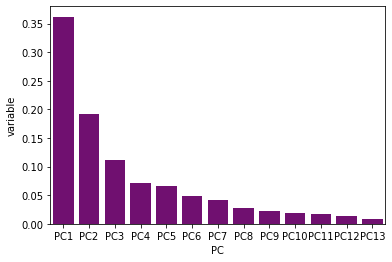

In [23]:
sns.barplot(x='PC',y="variable",data=df1,color="purple");

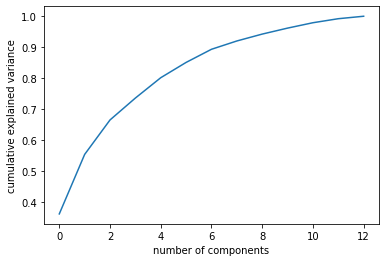

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [25]:
pca_2=PCA(n_components=2)
pca_2=pca_2.fit(X)
pca_2d=pca_2.transform(X)


In [26]:
pca_2d

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [27]:
PCA_dataset = pd.DataFrame(data = pca_2d, columns = ['component1', 'component2'] )
PCA_dataset.head()

,component1,component2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [28]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']

<Figure size 432x288 with 0 Axes>

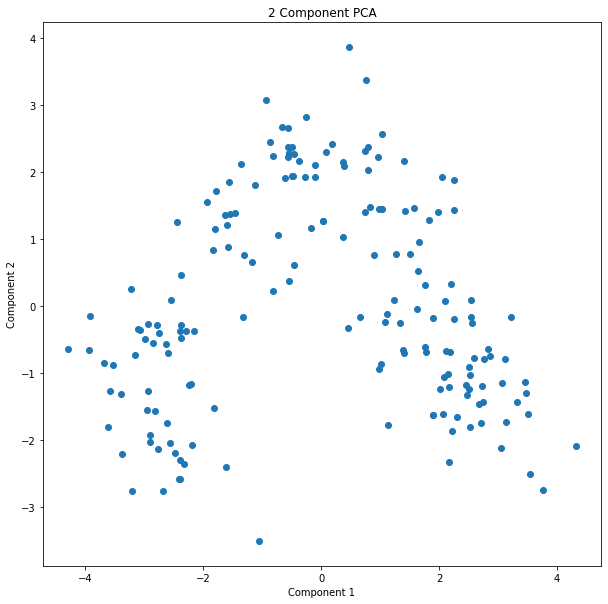

In [29]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset['component1'], PCA_dataset['component2'])

**SVD**

In [30]:
svd_df=pd.read_csv('Wine.csv')

In [31]:
svd_df.shape

(178, 14)

In [32]:
svd_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
x_var=svd_df.iloc[:,1:14]
y_var=svd_df.iloc[:,0]
scaler=StandardScaler()
x_feat=scaler.fit_transform(x_var)

In [34]:
u,s,v=np.linalg.svd(x_feat,full_matrices=True)

In [35]:
u.shape

(178, 178)

In [36]:
u

array([[-0.11459978,  0.06846814, -0.01033047, ..., -0.0271395 ,
        -0.05352221, -0.11794339],
       [-0.07634104, -0.01581391, -0.12630848, ...,  0.12306409,
         0.01127492,  0.12705457],
       [-0.08695796,  0.04891087,  0.06125879, ...,  0.0728871 ,
         0.01387352, -0.06094138],
       ...,
       [ 0.09252423,  0.13095846, -0.05864863, ...,  0.92912605,
        -0.04766098, -0.00691053],
       [ 0.08247579,  0.10897065, -0.03432473, ..., -0.04667465,
         0.94089462, -0.00874006],
       [ 0.11086844,  0.13133889,  0.06319694, ..., -0.00401242,
        -0.00750585,  0.93992429]])

In [37]:
s.shape

(13,)

In [38]:
s

array([28.94203422, 21.08225141, 16.04371561, 12.78973645, 12.32374195,
       10.68713954,  9.90368818,  7.8760733 ,  7.17081793,  6.6828618 ,
        6.33958815,  5.48097635,  4.28967045])

In [39]:
v.shape


(13, 13)

In [40]:
v

array([[-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
        -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
        -0.29671456, -0.37616741, -0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [ 0.0178563 , -0.53689028,  0.21417556, -0.06085941,  0.35179658,
        -0.19806835, -0.15229479,  0.20330102, -0.39905653, -0.06592568,
         0.42777141, -0.18412074,  0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

In [41]:
var_explained=np.round(s**2/np.sum(s**2),decimals=3)
var_explained

array([0.362, 0.192, 0.111, 0.071, 0.066, 0.049, 0.042, 0.027, 0.022,
       0.019, 0.017, 0.013, 0.008])

Text(0, 0.5, 'Percent of the variance explained')

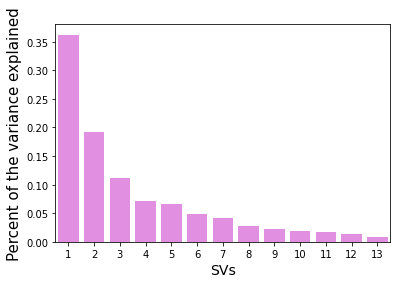

In [42]:
sns.barplot(x=list(range(1,len(var_explained)+1)),y=var_explained,color="violet")
plt.xlabel('SVs',fontsize=14)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [43]:
col_lab=['SV'+str(i) for i in range(1,3)]
svd_df1 = pd.DataFrame(u[:,0:2], index=svd_df["class"].tolist(), columns=col_lab)
svd_df1=svd_df1.reset_index()
svd_df1.rename(columns={'index':'Class'},inplace=True)
svd_df1.head(100)



,Class,SV1,SV2
0,1,-0.114600,0.068468
1,1,-0.076341,-0.015814
2,1,-0.086958,0.048911
3,1,-0.129813,0.130744
4,1,-0.034860,0.041259
...,...,...,...
95,2,-0.087895,0.008029
96,2,0.018795,-0.017499
97,2,-0.035625,-0.121693
98,2,-0.077808,-0.067960


**T-SNE**

In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [45]:
tsne_transform = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.839161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.322350
[t-SNE] KL divergence after 300 iterations: 0.347080


In [46]:
tsne_transform

array([[ 7.30471087e+00, -1.21712809e+01],
       [ 8.51661110e+00, -5.86626244e+00],
       [ 8.11379719e+00, -9.17485142e+00],
       [ 1.02813396e+01, -1.16652746e+01],
       [ 4.36270428e+00, -8.45114803e+00],
       [ 1.00219774e+01, -1.05588531e+01],
       [ 9.21729088e+00, -8.14407539e+00],
       [ 5.67296600e+00, -1.04154491e+01],
       [ 1.00625410e+01, -8.45962906e+00],
       [ 8.81372833e+00, -1.04482117e+01],
       [ 9.74814320e+00, -9.43471146e+00],
       [ 8.54597855e+00, -7.05119896e+00],
       [ 8.50294971e+00, -7.92832851e+00],
       [ 1.15270977e+01, -9.40561104e+00],
       [ 1.11967793e+01, -9.76650238e+00],
       [ 6.58620501e+00, -9.38228321e+00],
       [ 6.46884966e+00, -9.98839951e+00],
       [ 5.99124289e+00, -9.63785648e+00],
       [ 1.06295452e+01, -1.06378107e+01],
       [ 6.31069136e+00, -1.17685957e+01],
       [ 7.38515043e+00, -1.20861235e+01],
       [ 4.54032755e+00, -6.76533937e+00],
       [ 7.76616621e+00, -7.54811716e+00],
       [ 6.

In [47]:
tsne_set=pd.DataFrame(data=tsne_transform,columns=['Component1','Component2'])

In [48]:
tsne_set.head()

,Component1,Component2
0,7.304711,-12.171281
1,8.516611,-5.866262
2,8.113797,-9.174851
3,10.281340,-11.665275
4,4.362704,-8.451148


In [49]:
##Extracting two features

tsne_comp1=tsne_set['Component1']
tsne_comp2=tsne_set['Component2']

<Figure size 432x288 with 0 Axes>

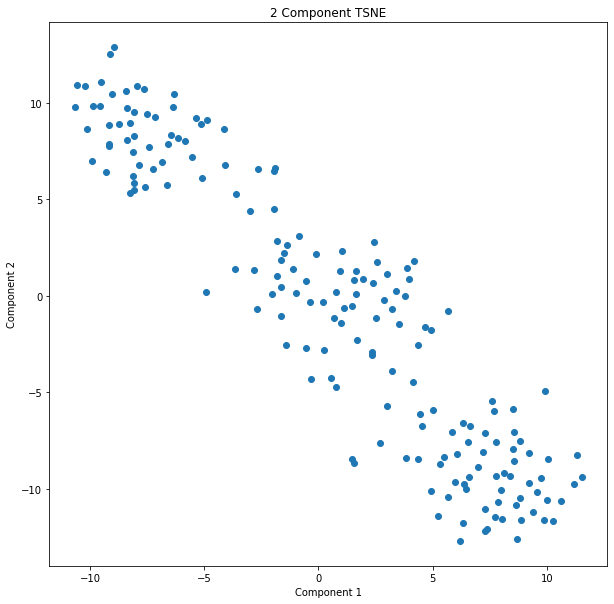

In [50]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_comp1, tsne_comp2)

**UMAP**

In [51]:
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [52]:
umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

In [53]:
umap_component1

array([ 0.16393209, -0.37425327, -1.5594268 , -0.4106446 ,  2.9627323 ,
       -1.0988132 , -1.2350793 , -0.5477331 , -0.590029  , -0.24941856,
       -1.6107317 , -1.5989802 , -1.6319184 , -0.9556319 , -1.0576364 ,
       -1.369525  , -1.1084613 , -1.2170191 , -1.3447238 ,  0.55056417,
        0.3730727 ,  2.0056126 , -0.19799563, -0.11772523,  0.51189804,
        3.5064335 , -0.7345646 , -1.462215  , -0.16309859, -0.24847406,
       -1.7084855 , -1.4921596 , -0.69595116, -0.7267105 , -1.072761  ,
        0.41707218, -0.64852685, -1.5912527 , -1.0682421 ,  0.8707958 ,
        0.5912504 ,  0.57045335, -0.17437917,  1.079032  ,  0.38197696,
        0.6541599 ,  0.15085341,  0.08534995, -0.96390253, -0.952255  ,
       -0.7170107 , -1.520065  , -0.4579339 , -1.1799867 ,  0.04349076,
       -0.20530473,  0.16917585, -1.069095  , -0.7366687 ,  2.454341  ,
        6.4613423 ,  7.1655426 ,  2.2352297 ,  2.2871034 ,  5.4140053 ,
        2.7058449 ,  2.0042236 ,  3.0019183 ,  6.670621  ,  1.34

In [54]:
umap_component2

array([ 8.54357  ,  7.7945533,  8.381575 ,  8.733458 , 10.241142 ,
        8.6761265,  7.6955037,  9.385527 ,  7.5569644,  8.176414 ,
        8.010811 ,  7.628874 ,  7.84443  ,  7.424626 ,  7.8384037,
        9.535563 ,  9.242155 ,  9.411644 ,  8.730036 ,  8.12677  ,
        8.381919 ,  9.047177 ,  7.916485 ,  9.282655 ,  9.3980255,
       10.349898 ,  8.989721 ,  7.547318 ,  9.832122 ,  7.5219398,
        8.83502  ,  8.51389  ,  7.1132874,  9.971423 ,  9.792456 ,
        8.924462 ,  9.698617 ,  9.314746 ,  7.295897 ,  7.985792 ,
        8.30171  ,  7.4057765,  8.674304 ,  7.7748766,  8.11833  ,
        7.670173 ,  7.4936256,  7.852003 ,  8.078534 ,  8.262788 ,
        8.144618 ,  8.143174 ,  8.454544 ,  9.2836485,  8.383353 ,
        8.682717 ,  8.258593 ,  9.140412 ,  8.606887 ,  7.01414  ,
        9.462509 , 10.022831 ,  7.3349524,  8.421006 ,  8.578216 ,
        8.986567 ,  7.894329 ,  7.8229885,  9.756222 ,  8.799028 ,
       10.380923 ,  8.675972 ,  8.257273 ,  9.679966 ,  9.2981

<Figure size 432x288 with 0 Axes>

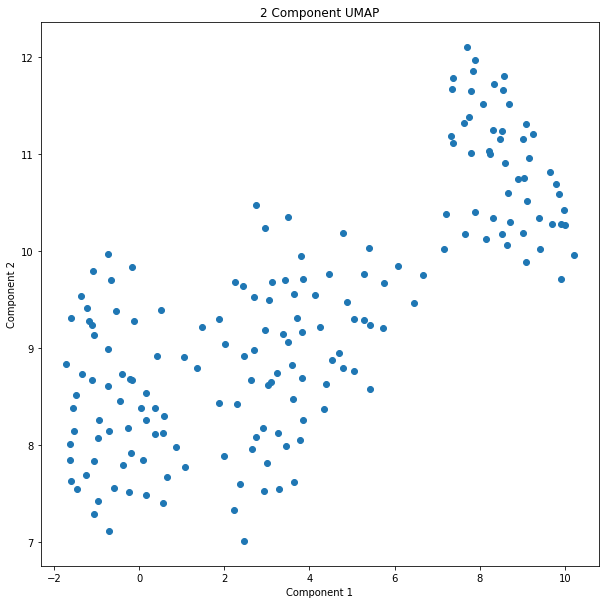

In [55]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)

**LLE**

In [60]:
lle_emb=pd.read_csv('Wine.csv')
embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(X)
X_transformed.shape



(178, 2)

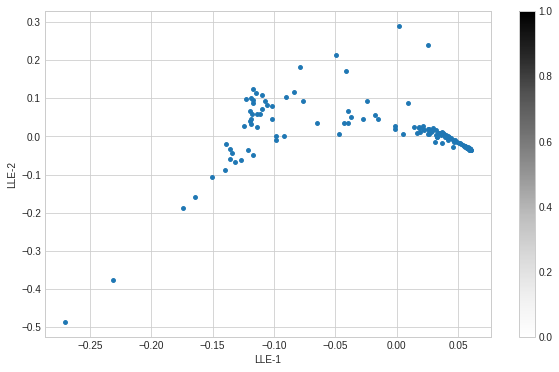

In [63]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

ISOMAP

In [64]:
from sklearn.manifold import Isomap

In [65]:
embed = Isomap(n_components = 2)

In [66]:
X_transformed = embedding.fit_transform(X)

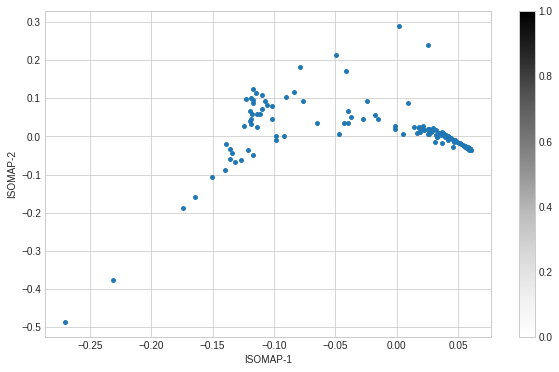

In [67]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

In [70]:
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

LLE: 0.056 sec
t-SNE: 0.93 sec
UMAP: 1.9 sec
ISOMAP: 0.026 sec
SVD: 0.0016 sec
PCA: 0.00085 sec


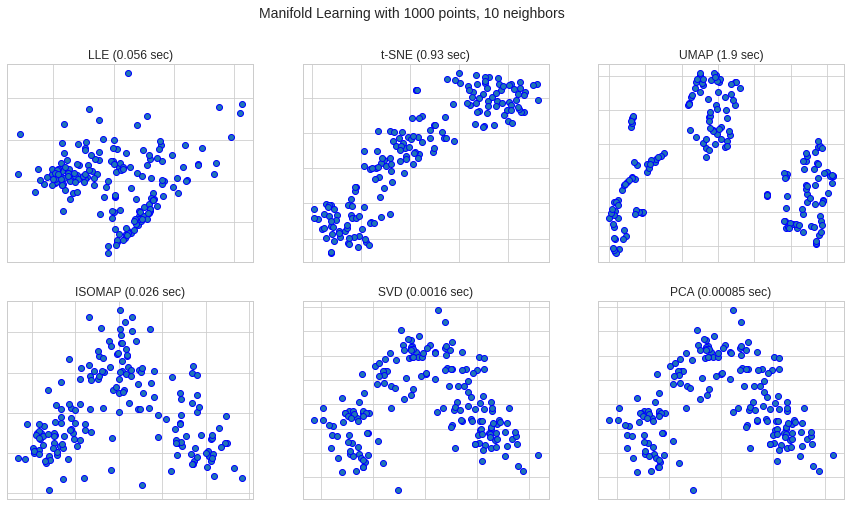

In [74]:
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['UMAP'] = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    a = time()
    Y = method.fit_transform(X)
    b = time()
    print("%s: %.2g sec" % (label, b - a))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral,edgecolors= 'blue')
    ax.set_title("%s (%.2g sec)" % (label, b - a))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()